In [120]:
from sympy import *

In [121]:
t = symbols('t')
v = Function("v")
h = Function("h")
g = 1.6
m = 1
k = 0.01

In [122]:
eqV1 = (Eq(Derivative(v(t),t), -m*g))
eqV1

Eq(Derivative(v(t), t), -1.6)

In [123]:
eqV2 = (Eq(Derivative(v(t), t), - m * g - k * v(t)))
eqV2

Eq(Derivative(v(t), t), -0.01*v(t) - 1.6)

In [124]:
eqV3 = (Eq(Derivative(v(t), t), - m * g - k * v(t) ** 2))
eqV3

Eq(Derivative(v(t), t), -0.01*v(t)**2 - 1.6)

In [125]:
Vt1 = dsolve(eqV1, v(t), ics={v(0):100})
Vt2 = dsolve(eqV2, v(t), ics={v(0):100})
Vt3 = dsolve(eqV3, v(t), ics={v(0):100})

In [126]:
eqHt1 = Eq(Derivative(h(t),t), Vt1.rhs)
eqHt2 = Eq(Derivative(h(t),t), Vt2.rhs)
eqHt3 = Eq(Derivative(h(t),t), Vt3.rhs)

In [127]:
Ht1 = dsolve(eqHt1, h(t), ics={h(0):0})
Ht2 = dsolve(eqHt2, h(t), ics={h(0):0})
Ht3 = dsolve(eqHt3, h(t), ics={h(0):0})

In [128]:
tmax1 = solve(Vt1.rhs, t)[0]
tmax2 = solve(Vt2.rhs, t)[0]
tmax3 = solve(Vt3.rhs, t)[0]

In [129]:
tback1 = solve(Ht1.rhs, t)[1]
#tback2 = solve(Ht2.rhs, t)
tback2 = nsolve(Ht2.rhs, (50, 150), solver='bisect', verify=False)
tback3 = solve(Ht3.rhs, t)[1]
print(tback1, tback2, tback3)

125.000000000000 106.458434463298 22.8470360870673


In [130]:
Hmax1 = Ht1.rhs.subs(t, tmax1)
Hmax2 = Ht2.rhs.subs(t, tmax2)
Hmax3 = Ht3.rhs.subs(t, tmax3)

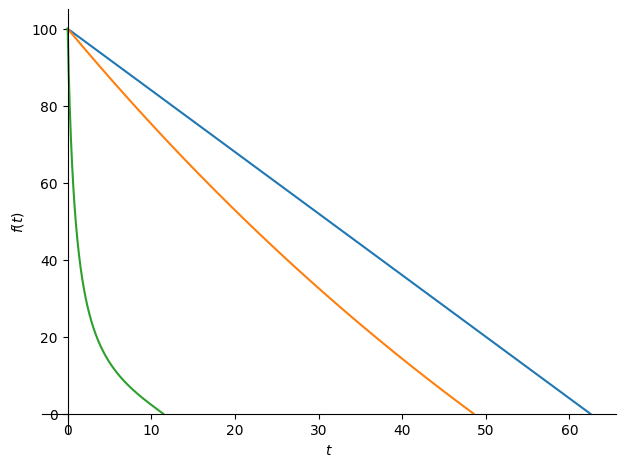

In [131]:
pV1 = plot(Vt1.rhs, (t, 0, tmax1), show=false)
pV2 = plot(Vt2.rhs, (t, 0, tmax2), show=false)
pV3 = plot(Vt3.rhs, (t, 0, tmax3), show=false)
pV1.extend(pV2)
pV1.extend(pV3)
pV1.show()

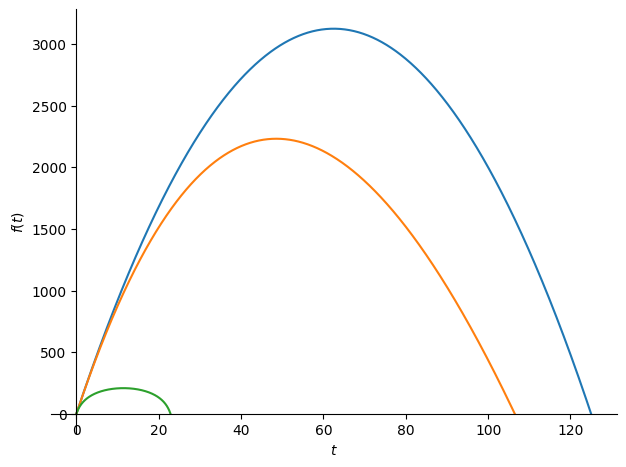

In [132]:
ph1 = plot(Ht1.rhs, (t, 0, tback1), show=false)
ph2 = plot(Ht2.rhs, (t, 0, tback2), show=false)
ph3 = plot(Ht3.rhs, (t, 0, tback3), show=false)
ph1.extend(ph2)
ph1.extend(ph3)
ph1.show()